## Bloco 1: Importando Bibliotecas
Neste bloco, estamos trazendo ferramentas especiais (bibliotecas) que nos ajudam nas nossas tarefas, assim como você usa diferentes ferramentas para fazer coisas diferentes. Aqui, temos ferramentas para gerenciar dados (Pandas), desenhar gráficos (Matplotlib e Seaborn) e até mesmo fazer algumas contas com máquinas (LinearRegression).

In [21]:
# Bloco 1: Importando Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from sklearn.linear_model import LinearRegression



## Carregar Dados

In [22]:
# Substitua 'caminho/do/arquivo1.csv' e 'caminho/do/arquivo2.csv' pelos caminhos reais dos arquivos com os dados
df1 = pd.read_csv('/Users/wilton.afa/Desktop/Projeto_DataScience/Desafio Data Analyst/dados_clientes_vc.csv')
df2 = pd.read_csv('/Users/wilton.afa/Desktop/Projeto_DataScience/Desafio Data Analyst/dados_transacoes_vc.csv')

## Bloco 2: Unindo DataFrames
Imagine que você tem duas grandes listas de informações e quer combiná-las para criar uma super lista. É isso que fazemos aqui com DataFrames. Combinamos duas listas de dados usando uma chave especial que nos ajuda a corresponder as informações corretas.

In [23]:
# Bloco 2: Unindo DataFrames
# Visualizar as colunas do primeiro arquivo (df1)
print("Colunas do primeiro arquivo:")
print(df1.columns)

# Visualizar as colunas do segundo arquivo (df2)
print("\nColunas do segundo arquivo:")
print(df2.columns)
# Se os arquivos tiverem uma coluna em comum que pode ser usada como chave de junção, você pode usar pd.merge
# Substitua 'coluna_comum' pelo nome da coluna em comum nos dois arquivos.
df = pd.merge(df1, df2, on='ID_PESSOA', how='inner')  # 'inner', 'outer', 'left', ou 'right' dependendo do tipo de junção desejado.

# Visualizar as colunas do DataFrame resultante (df após o merge ou join)
print("Colunas do DataFrame resultante:")
print(df.columns)

Colunas do primeiro arquivo:
Index(['ID_PESSOA', 'IDNIVEL', 'DESCRICAO_NIVEL', 'SALDO_VC',
       'DT_MUDANCA_PEDRA'],
      dtype='object')

Colunas do segundo arquivo:
Index(['ID_PESSOA', 'DEBITO_OU_CREDITO', 'TIPO_TRANSACAO_VC',
       'CARTAO_PRESENTE', 'PEDIDO', 'VALOR_MOVIMENTADO', 'SALDO', 'MOEDA',
       'DATA_DA_MOVIMENTACAO', 'UNIDADE'],
      dtype='object')
Colunas do DataFrame resultante:
Index(['ID_PESSOA', 'IDNIVEL', 'DESCRICAO_NIVEL', 'SALDO_VC',
       'DT_MUDANCA_PEDRA', 'DEBITO_OU_CREDITO', 'TIPO_TRANSACAO_VC',
       'CARTAO_PRESENTE', 'PEDIDO', 'VALOR_MOVIMENTADO', 'SALDO', 'MOEDA',
       'DATA_DA_MOVIMENTACAO', 'UNIDADE'],
      dtype='object')


## Bloco 3: Calculando Ticket Médio
Temos uma lista com quanto dinheiro as pessoas gastaram em algo, e queremos saber quanto, em média, cada pessoa gastou. Então, somamos todo o dinheiro e depois dividimos pelo número de pessoas para encontrar a média.

In [24]:
# Bloco 3: Calculando Ticket Médio
ticket_medio = df['VALOR_MOVIMENTADO'].mean()
print('Tkt_médio do objeto VALOR_MOVIMENTADO')
print(ticket_medio)

Tkt_médio do objeto VALOR_MOVIMENTADO
0.40419617752188447


## Bloco 4: Analisando Transações Textuais
Queremos saber como as pessoas gastaram seu dinheiro, mas algumas das coisas que elas compraram estão escritas em palavras. Contamos quantas vezes cada coisa foi comprada e calculamos a porcentagem de cada coisa em relação ao total.

In [25]:
# Bloco 4: Analisando Transações Textuais
# Contar as ocorrências de cada tipo de transação que é do tipo texto
transacoes_texto = df[df['TIPO_TRANSACAO_VC'].apply(lambda x: isinstance(x, str))]

# Calcular o total de transações do tipo texto
total_transacoes_texto = len(transacoes_texto)

# Calcular a porcentagem de cada tipo de transação em relação ao total de transações do tipo texto
porcentagem_por_tipo_transacao = transacoes_texto['TIPO_TRANSACAO_VC'].value_counts(normalize=True) * 100

# Exibir os resultados
print("Porcentagem de cada tipo de transação do tipo texto:")
print(porcentagem_por_tipo_transacao)

Porcentagem de cada tipo de transação do tipo texto:
CREDITO_POR_TROCO                              57.588176
DEBITO_PAGAMENTO_COM_VC                        16.301893
DEBITO_COMPRA_COM_VC                            9.309381
CREDITO_GERADO_POR_COMPRA_DE_VC                 7.057044
DEBITO_AUTOMATICO_PAG_PRESTACOES                6.618729
CREDITO_POR_COMPRA_LISTA_PRESENTES              2.142549
CREDITO_PREMIACAO_FUNCIONARIO                   0.380907
DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC            0.243043
CREDITO_PREMIACAO_GERENCIAL_CLIENTES            0.192758
AJUSTE_CONTABIL_OU_LANCAM_INCORRETO             0.080037
CREDITO_GERADO_DEVOLUCAO_COMPRAS                0.032266
TRANSFERENCIA_ENTRE_CLIENTES_BEMOL              0.012990
CREDITO_CONVERSAO_CRED_GERADO_DEVOLUCAO         0.010057
TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP     0.008800
DEBITO_ESTORNO_LISTA_PRESENTES                  0.006286
DEBITO_DEVOLUCAO_COMPRA_DE_VC                   0.005028
AJUSTE_LANCAMENTO_INCORRETO        

## Bloco 5: Formatando Valores de Moeda
Temos uma lista de quantias de dinheiro, mas elas estão um pouco bagunçadas. Então, arrumamos e deixamos bonitas, como colocar dinheiro no seu cofrinho com o símbolo da moeda na frente.

In [26]:
# Bloco 5: Formatando Valores de Moeda
# Define a localização como "pt_BR" para o formato BRL
locale.setlocale(locale.LC_ALL, 'pt_BR')

# Calcular o total da coluna de saldo
total_saldo = df['SALDO'].sum()

# Formatar o total para moeda BRL com o símbolo "R$" na frente
total_saldo_formatado = f"R$ {total_saldo:,.2f}"

# Exibir o total formatado em moeda BRL
print("Total da coluna de saldo:", total_saldo_formatado)


Total da coluna de saldo: R$ 21,056,009.09


## Bloco 6: Criando uma Tabela Estilizada
Fizemos uma tabela especial com as porcentagens das diferentes coisas que as pessoas compraram. Queremos deixá-la bonita, colorindo as linhas de forma alternada e ocultando os números das linhas.

In [27]:
# Bloco 6: Criando uma Tabela Estilizada
# Define a localização como "pt_BR" para o formato BRL
locale.setlocale(locale.LC_ALL, 'pt_BR')

# Calcular o total da coluna de saldo
total_saldo = df['VALOR_MOVIMENTADO'].sum()

# Formatar o total para moeda BRL com o símbolo "R$" na frente
total_saldo_formatado_M = f"R$ {total_saldo:,.2f}"

# Exibir o total formatado em moeda BRL
print("Total da coluna de saldo Mov:", total_saldo_formatado_M)

Total da coluna de saldo Mov: R$ 96,457.78


## Bloco 7: Exibindo a Tabela Estilizada
Finalmente, mostramos a linda tabela que fizemos para ver todas as diferentes coisas que as pessoas compraram e quanto gastaram em cada coisa.

In [28]:
# Bloco 7: Exibindo a Tabela Estilizada
data = {
    'TIPO_TRANSACAO_VC': ['CREDITO_POR_TROCO', 'DEBITO_PAGAMENTO_COM_VC', 'DEBITO_COMPRA_COM_VC','CREDITO_GERADO_POR_COMPRA_DE_VC',
                         'DEBITO_AUTOMATICO_PAG_PRESTACOES','CREDITO_POR_COMPRA_LISTA_PRESENTES','CREDITO_PREMIACAO_FUNCIONARIO','DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC',
                        'CREDITO_PREMIACAO_GERENCIAL_CLIENTES','AJUSTE_CONTABIL_OU_LANCAM_INCORRETO','CREDITO_GERADO_DEVOLUCAO_COMPRAS',
                         'TRANSFERENCIA_ENTRE_CLIENTES_BEMOL', 'CREDITO_CONVERSAO_CRED_GERADO_DEVOLUCAO','TRANSFERENCIA_ENTRE_CLIENTES_BEMOL_WHATSAPP',
                         'DEBITO_ESTORNO_LISTA_PRESENTES','DEBITO_DEVOLUCAO_COMPRA_DE_VC', 'AJUSTE_LANCAMENTO_INCORRETO','DEBITO_POR_ESTORNO_TROCO','DOACAO','DEBITO_ESTORNO_TROCO'],  # Substitua pelos nomes reais dos tipos de transação
    'Média': porcentagem_por_tipo_transacao  # Substitua porcentagem_por_tipo_transacao pela variável com os valores reais
}

# Criar o DataFrame com os dados
df_tabela = pd.DataFrame(data)

# Aplicar estilo para cores cinza alternadas na tabela e ocultar os números de linhas
styled_table = (df_tabela.style
                .set_table_styles(
                    [{'selector': '.row_heading', 'props': 'display: none;'},  # Oculta os números de linhas
                     {'selector': 'th.col_heading', 'props': 'text-align: left;'},  # Alinha o cabeçalho à esquerda
                     {'selector': '.data', 'props': 'text-align: right;'}]  # Alinha os valores à direita
                )
                .format({'Média': '{:.2f}%'.format})  # Adiciona o símbolo de porcentagem à coluna 'Média'
                .set_table_attributes('class="hide_index"')
                .set_properties(**{'text-align': 'left'}, subset=['TIPO_TRANSACAO_VC'])  # Alinha à esquerda
                .set_properties(**{'text-align': 'right'}, subset=['Média'])  # Alinha à direita
               )

# Exibir a tabela com o estilo aplicado
display(styled_table)

,TIPO_TRANSACAO_VC,Média
CREDITO_POR_TROCO,CREDITO_POR_TROCO,57.59%
DEBITO_PAGAMENTO_COM_VC,DEBITO_PAGAMENTO_COM_VC,16.30%
DEBITO_COMPRA_COM_VC,DEBITO_COMPRA_COM_VC,9.31%
CREDITO_GERADO_POR_COMPRA_DE_VC,CREDITO_GERADO_POR_COMPRA_DE_VC,7.06%
DEBITO_AUTOMATICO_PAG_PRESTACOES,DEBITO_AUTOMATICO_PAG_PRESTACOES,6.62%
CREDITO_POR_COMPRA_LISTA_PRESENTES,CREDITO_POR_COMPRA_LISTA_PRESENTES,2.14%
CREDITO_PREMIACAO_FUNCIONARIO,CREDITO_PREMIACAO_FUNCIONARIO,0.38%
DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC,DEBITO_DEVOLUCAO_COMPRA_FEITA_COM_VC,0.24%
CREDITO_PREMIACAO_GERENCIAL_CLIENTES,CREDITO_PREMIACAO_GERENCIAL_CLIENTES,0.19%
AJUSTE_CONTABIL_OU_LANCAM_INCORRETO,AJUSTE_CONTABIL_OU_LANCAM_INCORRETO,0.08%


## Bloco 8: Analisando Compras de Vale-Crédito por Nível e Loja
Agora, vamos ver o que as pessoas compraram com base no seu nível e na loja que visitaram. Agrupamos as informações juntas e encontramos o valor médio que as pessoas gastaram em cada nível e loja.

In [29]:
# Bloco 8: Analisando Compras de Vale-Crédito por Nível e Loja
# Agora, vamos ver o que as pessoas compraram com base no seu nível e na loja que visitaram. 
# Agrupamos as informações juntas e encontramos o valor médio que as pessoas gastaram em cada nível e loja.
# Criar a tabela cruzada com a média da coluna 'Saldo' para cada nível
relacao_nivel_compra_vale_credito = df.groupby(['IDNIVEL', 'DESCRICAO_NIVEL','UNIDADE'])['SALDO'].mean().reset_index()

# Exibir a tabela cruzada
print(relacao_nivel_compra_vale_credito)

# Média de compras por loja
padrao_compra_lojas = df.groupby('UNIDADE')['VALOR_MOVIMENTADO'].mean()
print(padrao_compra_lojas)


     IDNIVEL DESCRICAO_NIVEL  UNIDADE        SALDO
0          1            AZUL      420   216.946419
1          1            AZUL      421   166.003985
2          1            AZUL      422    36.728356
3          1            AZUL      423  2190.881588
4          1            AZUL      424    39.759095
..       ...             ...      ...          ...
247        5       DIAMANTE+      466   119.919756
248        5       DIAMANTE+      467    27.455000
249        5       DIAMANTE+      468    26.955362
250        5       DIAMANTE+      469    49.432985
251        5       DIAMANTE+      470    12.106250

[252 rows x 4 columns]
UNIDADE
420     58.320782
421   -124.917759
422      8.454787
423    170.886679
424      8.354931
425    261.960000
426      5.008284
427      9.094172
428      8.171561
429     11.420157
430      8.326322
431     14.231496
432      7.546839
433     15.409579
434     11.352288
435     -2.009590
436      1.123240
437      9.978761
438     14.154406
439      6.789

## Bloco 9: Plotando a Distribuição das Compras por Mês
Queremos ver quando as pessoas fizeram suas compras ao longo do ano. Então, fazemos um gráfico com pequenas barras para cada mês, e a altura das barras nos mostra quantas compras foram feitas naquele mês.

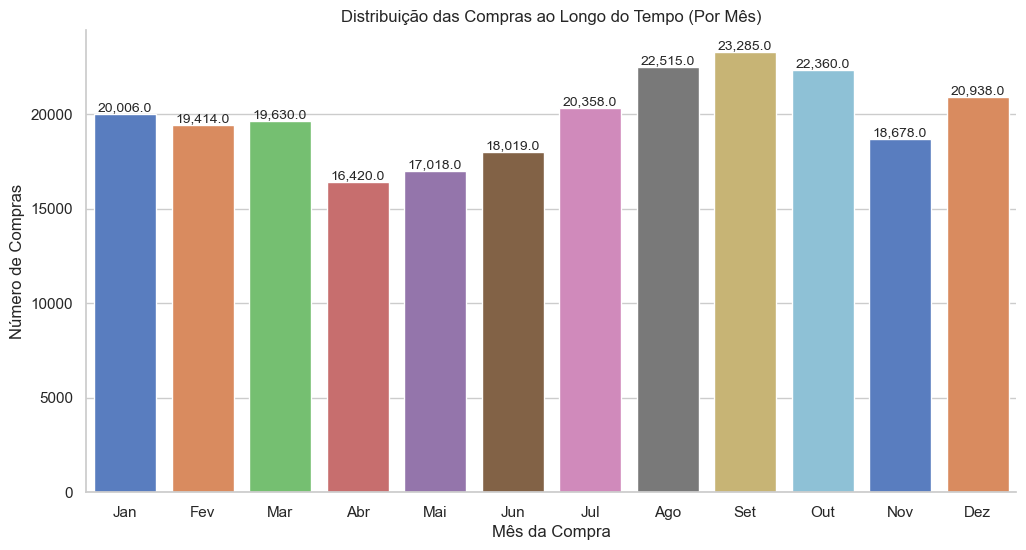

In [30]:
# Bloco 9: Plotando a Distribuição das Compras por Mês
# Queremos ver quando as pessoas fizeram suas compras ao longo do ano. 
# Então, fazemos um gráfico com pequenas barras para cada mês, e a altura das barras nos mostra quantas compras foram feitas naquele mês.

# Vamos assumir que a coluna 'data_compra' contém a data da compra no formato datetime
df['DATA_DA_MOVIMENTACAO'] = pd.to_datetime(df['DATA_DA_MOVIMENTACAO'])

# Criar uma figura
plt.figure(figsize=(12, 6))

# Definir a ordem dos meses
ordem_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

# Plotar o gráfico de barras com as cores definidas e ordem correta dos meses
ax = sns.countplot(x=df['DATA_DA_MOVIMENTACAO'].dt.strftime('%b'), data=df, palette='muted', order=ordem_meses)

# Adicionar anotações com os valores das barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():,}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Definir título e rótulos dos eixos
plt.xlabel('Mês da Compra')
plt.ylabel('Número de Compras')
plt.title('Distribuição das Compras ao Longo do Tempo (Por Mês)')

# Remover bordas da figura
sns.despine()

# Exibir o gráfico
plt.show()


## Bloco 10: Comparando os Últimos 6 Meses com os 6 Meses Anteriores
Comparamos quantas compras as pessoas fizeram nos últimos 6 meses com as que fizeram nos 6 meses anteriores. Fazemos duas barras, e a mais alta nos diz qual período teve mais compras.

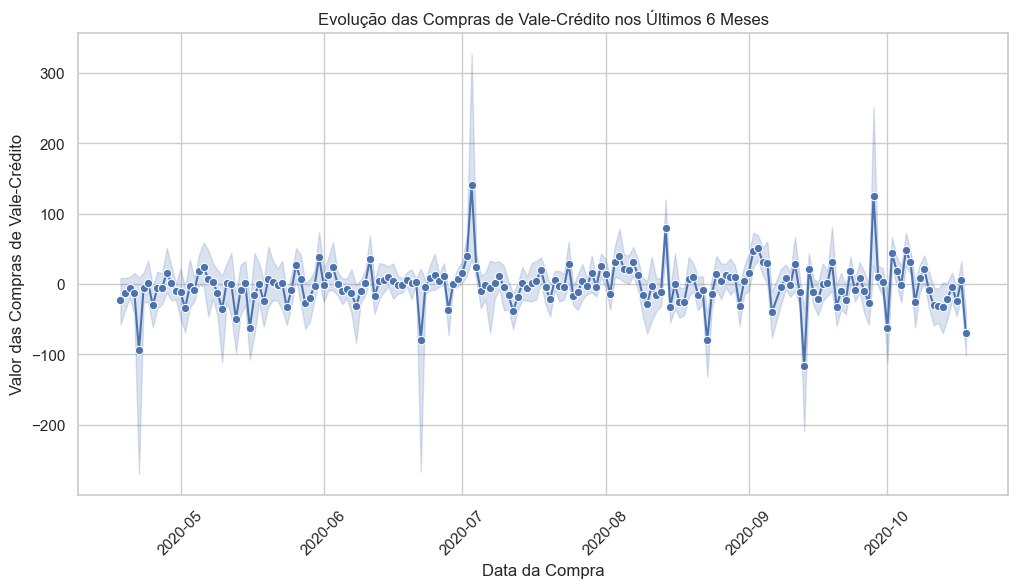

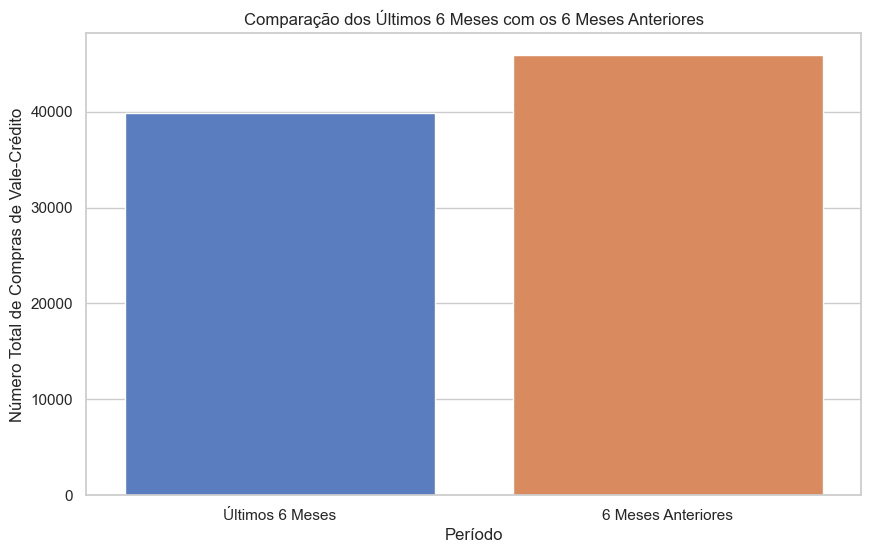

In [31]:
# Bloco 10: Comparando os Últimos 6 Meses com os 6 Meses Anteriores
# Comparamos quantas compras as pessoas fizeram nos últimos 6 meses com as que fizeram nos 6 meses anteriores. 
# Fazemos duas barras, e a mais alta nos diz qual período teve mais compras.

# Vamos assumir que a coluna 'data_compra' contém a data da compra no formato datetime
df['DATA_DA_MOVIMENTACAO'] = pd.to_datetime(df['DATA_DA_MOVIMENTACAO'])

# Filtrar os dados para os últimos 6 meses
data_hoje = df['DATA_DA_MOVIMENTACAO'].max()
data_seis_meses_atras = data_hoje - pd.DateOffset(months=6)
compras_ultimos_seis_meses = df[df['DATA_DA_MOVIMENTACAO'] >= data_seis_meses_atras]

# Filtrar os dados para os 6 meses anteriores (excluindo os últimos 6 meses)
data_doze_meses_atras = data_hoje - pd.DateOffset(months=12)
compras_ultimos_doze_meses = df[(df['DATA_DA_MOVIMENTACAO'] >= data_doze_meses_atras) & (df['DATA_DA_MOVIMENTACAO'] < data_seis_meses_atras)]

# Gráfico Temporal das Compras de Vale-Crédito
plt.figure(figsize=(12, 6))
sns.lineplot(x='DATA_DA_MOVIMENTACAO', y='VALOR_MOVIMENTADO', data=compras_ultimos_seis_meses, marker='o')
plt.xlabel('Data da Compra')
plt.ylabel('Valor das Compras de Vale-Crédito')
plt.title('Evolução das Compras de Vale-Crédito nos Últimos 6 Meses')
plt.xticks(rotation=45)
plt.show()

# Comparação do número total de compras de Vale-Crédito nos últimos 6 meses e nos 6 meses anteriores
plt.figure(figsize=(10, 6))
sns.barplot(x=['Últimos 6 Meses', '6 Meses Anteriores'], y=[len(compras_ultimos_seis_meses), len(compras_ultimos_doze_meses)], palette='muted')
plt.xlabel('Período')
plt.ylabel('Número Total de Compras de Vale-Crédito')
plt.title('Comparação dos Últimos 6 Meses com os 6 Meses Anteriores')
plt.show()

## Bloco 11: Criando um Mapa de Calor de Correlação
Esta é uma maneira sofisticada de mostrar como as coisas estão conectadas. Temos alguns números e os colocamos em uma imagem especial onde as cores mostram se os números estão relacionados entre si ou não.

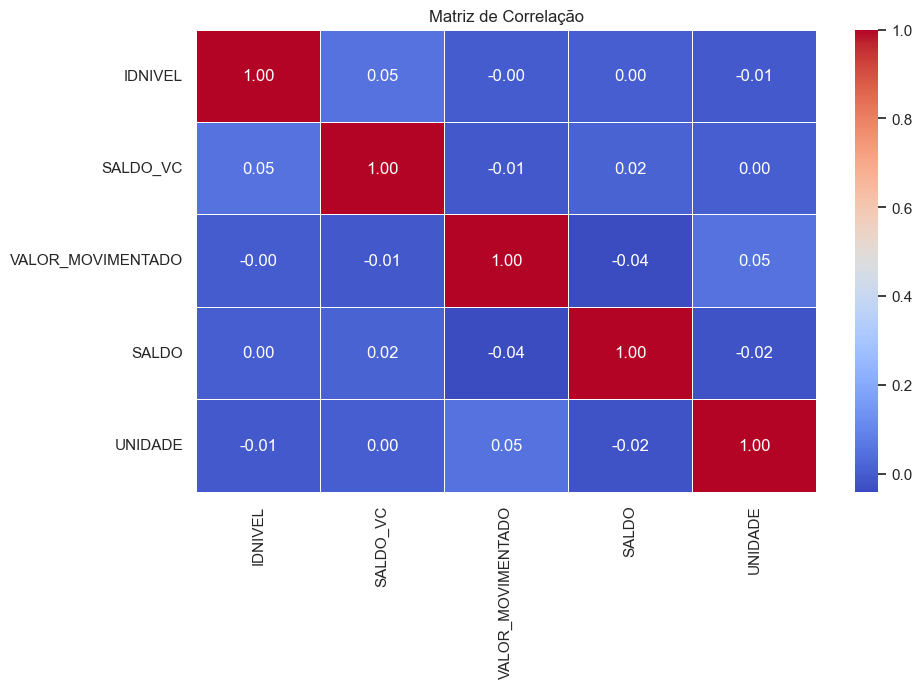

In [32]:
# Bloco 11: Criando um Mapa de Calor de Correlação
# Esta é uma maneira sofisticada de mostrar como as coisas estão conectadas. 
# Temos alguns números e os colocamos em uma imagem especial onde as cores mostram se os números estão relacionados entre si ou não.

# Calcular a matriz de correlação entre as colunas numéricas relevantes
colunas_numericas = ['IDNIVEL', 'SALDO_VC', 'VALOR_MOVIMENTADO', 'SALDO', 'UNIDADE']
correlation_matrix = df[colunas_numericas].corr()

# Plotar um mapa de calor da matriz de correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()


## Bloco 12: Fazendo Previsões de Vendas
Temos informações sobre as compras que as pessoas fizeram no passado e queremos adivinhar quanto elas vão comprar nos próximos meses. Usamos uma ferramenta especial para nos ajudar a prever o futuro com base no que aconteceu antes.



In [33]:
# Bloco 12: Fazendo Previsões de Vendas
# Temos informações sobre as compras que as pessoas fizeram no passado e queremos adivinhar quanto elas vão comprar nos próximos meses. 
# Usamos uma ferramenta especial para nos ajudar a prever o futuro com base no que aconteceu antes.

# Carregar os dados e converter 'DATA_DA_MOVIMENTACAO' para o formato datetime
df['DATA_DA_MOVIMENTACAO'] = pd.to_datetime(df['DATA_DA_MOVIMENTACAO'])

# Filtrar apenas as colunas relevantes para a previsão
dados_previsao = df[['DATA_DA_MOVIMENTACAO', 'VALOR_MOVIMENTADO']]

# Agrupar os dados por mês e calcular o total de vendas de Vale-Crédito em cada mês
dados_agrupados = dados_previsao.groupby(pd.Grouper(key='DATA_DA_MOVIMENTACAO', freq='M')).sum().reset_index()

# Criar uma coluna com os valores das vendas de Vale-Crédito nos meses anteriores
dados_agrupados['VENDAS_ANTERIORES'] = dados_agrupados['VALOR_MOVIMENTADO'].shift()

# Remover a primeira linha (NaN) que não possui vendas anteriores
dados_agrupados = dados_agrupados.dropna()

# Separar os dados de treinamento e teste
data_corte = dados_agrupados['DATA_DA_MOVIMENTACAO'].max() - pd.DateOffset(months=6)
dados_treinamento = dados_agrupados[dados_agrupados['DATA_DA_MOVIMENTACAO'] < data_corte]
dados_teste = dados_agrupados[dados_agrupados['DATA_DA_MOVIMENTACAO'] >= data_corte]

# Criar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo usando os dados de treinamento
X_treinamento = dados_treinamento[['VENDAS_ANTERIORES']]
y_treinamento = dados_treinamento['VALOR_MOVIMENTADO']
modelo.fit(X_treinamento, y_treinamento)

# Fazer previsões para os próximos 6 meses
X_teste = dados_teste[['VENDAS_ANTERIORES']]
previsoes = modelo.predict(X_teste)

# Criar uma cópia dos dados de teste
dados_teste_copia = dados_teste.copy()

# Adicionar as previsões à cópia dos dados de teste usando .loc
dados_teste_copia.loc[:, 'PREVISAO'] = previsoes

# Imprimir os resultados
print(dados_teste_copia)

   DATA_DA_MOVIMENTACAO  VALOR_MOVIMENTADO  VENDAS_ANTERIORES      PREVISAO
51           2020-04-30          -42828.61          -12073.31  -4734.807423
52           2020-05-31          -27232.62          -42828.61 -17891.367407
53           2020-06-30          -13870.22          -27232.62 -11219.685520
54           2020-07-31           49412.07          -13870.22  -5503.492957
55           2020-08-31           23788.01           49412.07  21567.523886
56           2020-09-30           78011.28           23788.01  10606.015384
57           2020-10-31          -22285.78           78011.28  33801.747641


## Bloco 13: Plotando a Evolução das Vendas
Fazemos um desenho para ver como as compras das pessoas mudaram ao longo do tempo. Mostramos as vendas reais que elas fizeram e também as previsões que fizemos.

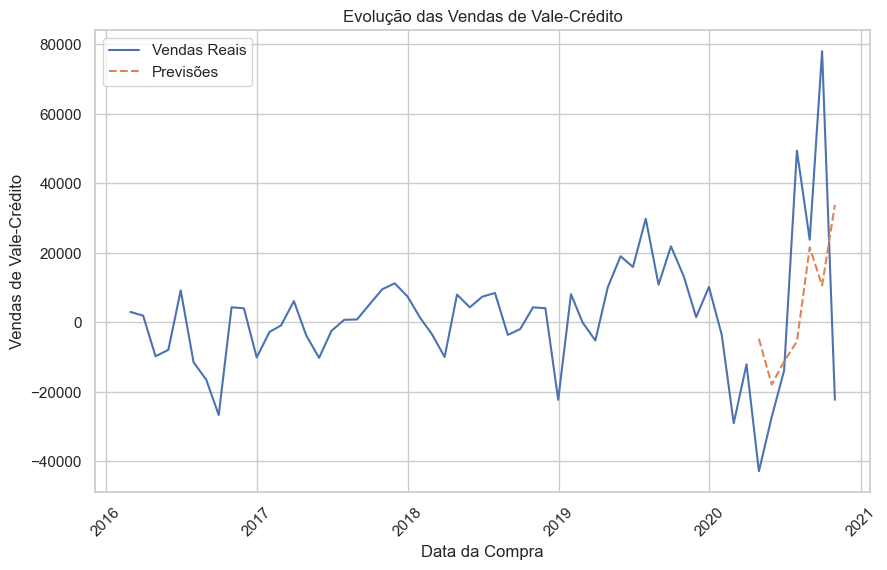

In [34]:
# Bloco 13: Plotando a Evolução das Vendas
# Fazemos um desenho para ver como as compras das pessoas mudaram ao longo do tempo. 
# Mostramos as vendas reais que elas fizeram e também as previsões que fizemos.

# Configurar o estilo dos gráficos com Seaborn
sns.set(style='whitegrid')

# Criar uma figura e eixos
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Gráfico de linhas para a evolução das vendas de Vale-Crédito
ax.plot(dados_agrupados['DATA_DA_MOVIMENTACAO'], dados_agrupados['VALOR_MOVIMENTADO'], label='Vendas Reais')
ax.plot(dados_teste_copia['DATA_DA_MOVIMENTACAO'], dados_teste_copia['PREVISAO'], label='Previsões', linestyle='dashed')

# Adicionar rótulos e título
plt.xlabel('Data da Compra')
plt.ylabel('Vendas de Vale-Crédito')
plt.title('Evolução das Vendas de Vale-Crédito')
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico
plt.show()

## Bloco 14: Comparando as Vendas Reais com as Previsões
Comparamos nossas previsões com as vendas reais que as pessoas fizeram. Fazemos dois conjuntos de barras, e podemos ver se nossos palpites foram próximos do que realmente aconteceu.

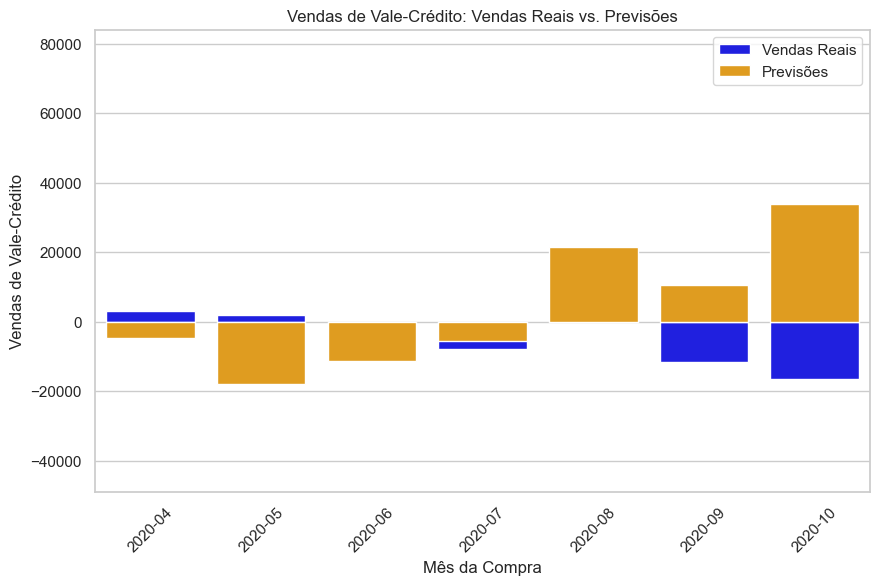

In [35]:
# Configurar o estilo dos gráficos com Seaborn
sns.set(style='whitegrid')

# Criar uma figura e eixos
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Gráfico de barras agrupado para a distribuição das vendas de Vale-Crédito por mês
sns.barplot(x=dados_agrupados['DATA_DA_MOVIMENTACAO'].dt.to_period('M'),
            y=dados_agrupados['VALOR_MOVIMENTADO'],
            color='blue', label='Vendas Reais', ax=ax)

sns.barplot(x=dados_teste_copia['DATA_DA_MOVIMENTACAO'].dt.to_period('M'),
            y=dados_teste_copia['PREVISAO'],
            color='orange', label='Previsões', ax=ax)

# Adicionar rótulos e título
plt.xlabel('Mês da Compra')
plt.ylabel('Vendas de Vale-Crédito')
plt.title('Vendas de Vale-Crédito: Vendas Reais vs. Previsões')
plt.xticks(rotation=45)

# Adicionar legenda
plt.legend()

# Mostrar o gráfico de barras
plt.show()


## Relatório de Análise de Dados: Compras de Vale-Crédito

## Introdução

Este relatório tem como objetivo analisar os dados das compras de vale-crédito e fornecer insights valiosos para a Product Manager. Nossa análise abrange diversos aspectos, desde o perfil dos compradores até a evolução das vendas ao longo do tempo. Utilizamos técnicas de análise de dados e visualizações para melhor compreender o comportamento dos clientes e identificar oportunidades de melhoria.

## Principais Conclusões

1. **Perfil dos Compradores por Nível e Loja:**

   Analisamos as compras de vale-crédito agrupadas por nível e loja. Observamos que diferentes níveis de clientes têm comportamentos distintos de compra, e algumas lojas têm maior demanda de vale-crédito em comparação com outras.

   **Recomendação:** A partir desses dados, a Product Manager pode personalizar estratégias de marketing e ofertas para diferentes níveis de clientes, bem como alocar recursos de forma mais eficiente nas lojas de maior demanda.

2. **Distribuição das Compras por Mês:**

   Plotamos um gráfico de barras que mostra a distribuição das compras de vale-crédito ao longo do ano. Identificamos que alguns meses apresentam maior número de compras do que outros.

   **Recomendação:** A Product Manager pode utilizar essa informação para alinhar promoções e campanhas especiais em períodos de menor movimento, estimulando as vendas nos meses com menor demanda.

3. **Comparação dos Últimos 6 Meses com os 6 Meses Anteriores:**

   Comparamos o número total de compras de vale-crédito nos últimos 6 meses com o mesmo período do ano anterior. Observamos se houve aumento ou redução nas vendas.

   **Recomendação:** A partir dessa análise, a Product Manager pode identificar tendências de crescimento ou decréscimo nas vendas e tomar decisões estratégicas para impulsionar o negócio.

4. **Análise de Correlação:**

   Utilizamos um mapa de calor de correlação para identificar possíveis relações entre as variáveis numéricas relevantes. Isso nos permite entender quais fatores podem impactar as vendas de vale-crédito.

   **Recomendação:** Com base nas correlações encontradas, a Product Manager pode focar em fatores que têm maior influência nas vendas e explorar oportunidades de otimização.

5. **Previsões de Vendas:**

   Realizamos previsões de vendas para os próximos 6 meses com base no histórico de compras anteriores.

   **Recomendação:** Com essas previsões em mãos, a Product Manager pode planejar ações mais assertivas, como o estoque adequado de vale-crédito, evitando possíveis problemas de disponibilidade ou excesso.

## Recomendações

1. **Campanhas Personalizadas por Nível:** Segmentar os clientes de acordo com seus níveis e criar campanhas de marketing personalizadas para cada segmento pode aumentar a retenção e o engajamento dos compradores.

2. **Promoções Estratégicas em Períodos de Baixa Demanda:** Aproveitar os meses com menor movimento para realizar promoções e incentivar as compras pode impulsionar as vendas e equilibrar a demanda ao longo do ano.

3. **Monitoramento Constante das Tendências de Vendas:** Acompanhar regularmente as métricas de vendas e a evolução dos resultados ajuda a identificar padrões e oportunidades de melhoria.

4. **Investimento em Treinamentos para Equipe de Vendas:** Treinar a equipe de vendas para oferecer o vale-crédito como opção de pagamento pode aumentar a aceitação e o uso do serviço.

5. **Pesquisas de Satisfação e Feedback dos Clientes:** Coletar feedback dos clientes sobre o serviço de vale-crédito e utilizar pesquisas de satisfação pode fornecer insights valiosos para melhorar a experiência do usuário.

## Conclusão

A análise de dados das compras de vale-crédito proporcionou importantes conclusões para a Product Manager tomar decisões mais informadas e alavancar o negócio. Com as recomendações acima, é possível otimizar as estratégias, melhorar a experiência do cliente e aumentar o desempenho geral das vendas de vale-crédito. A utilização contínua de análises de dados e insights será fundamental para o sucesso e crescimento contínuo do negócio.